In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [3]:
#시계열 데이터 생성
np.random.seed(42)
n=100 #데이터 포인트 수
ar_params = [0.7]
ma_params = [0.4, -0.2] #이동평균 계수
residuals = np.random.normal(0, 1, n) #잔차 생성

In [5]:
#ARMA(1, 2) 모델 생성
data = [0,0] #초기값 설정
for i in range(2, n):
    ar_term = ar_params[0] * data[i-1]
    ma_term = ma_params[0] *residuals[i-1] + ma_params[1] * ma_params[1] * residuals[i-2]
    data.append(ar_term + ma_term + residuals[i])

In [7]:
#데이터 프레임 생성
df = pd.DataFrame({
    'Value' : data
})
print(df)

       Value
0   0.000000
1   0.000000
2   0.612251
3   2.205151
4   1.944572
..       ...
95 -2.073481
96 -1.756407
97 -0.908522
98 -0.514585
99 -0.582309

[100 rows x 1 columns]


In [9]:
# ARMA(1,2) 모델 적합
model = ARIMA(df['Value'], order=(1,0,2))

results = model.fit()

In [11]:
#ARMA(1,2) 모델 정보 출력
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -132.064
Date:                Thu, 01 Jun 2023   AIC                            274.128
Time:                        09:47:34   BIC                            287.154
Sample:                             0   HQIC                           279.400
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4913      0.401     -1.224      0.221      -1.278       0.295
ar.L1          0.6949      0.125      5.547      0.000       0.449       0.940
ma.L1          0.3751      0.186      2.012      0.0

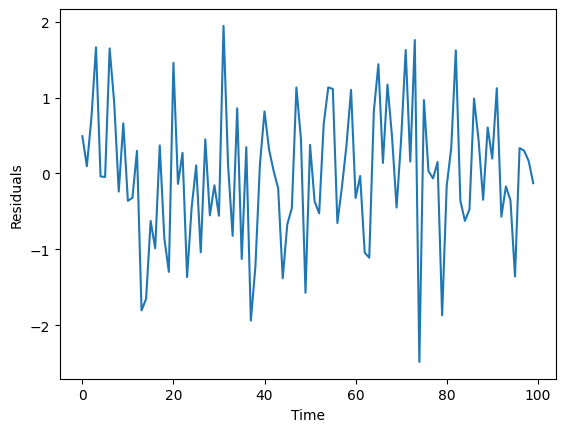

In [12]:
#잔차 시계열 그래프 출력
plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()